# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [167]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pytz

%matplotlib inline

In [168]:
!pip install python-dotenv

You should consider upgrading via the 'c:\users\aaron\anaconda3\python.exe -m pip install --upgrade pip' command.


In [169]:
!pip install alpaca-trade-api

You should consider upgrading via the 'c:\users\aaron\anaconda3\python.exe -m pip install --upgrade pip' command.


In [116]:
# Load the environment variables from the .env file
#by calling the load_dotenv function

load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [117]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [118]:
# The monthly amount for the member's household income

monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [119]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [120]:
# Using the Python requests library, make an API call to access the current price of BTC

btc_response = requests.get(btc_url).json()


# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18853381,
            "id": 1,
            "last_updated": 1635129505,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 1168082640560,
                    "percent_change_1h": -0.197564567867383,
                    "percent_change_24h": 1.2531720049037,
                    "percent_change_7d": 0.630190432145775,
                    "percentage_change_1h": -0.197564567867383,
                    "percentage_change_24h": 1.2531720049037,
                    "percentage_change_7d": 0.630190432145775,
                    "price": 61972.0,
                    "volume_24h": 31057994866
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18853381,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

In [121]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

requests.get(eth_url).json()


{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 118064999,
   'total_supply': 118064999,
   'max_supply': 0,
   'quotes': {'USD': {'price': 4116.6,
     'volume_24h': 16680262167,
     'market_cap': 487434683374,
     'percentage_change_1h': -0.516398455648235,
     'percentage_change_24h': -0.417234098204833,
     'percentage_change_7d': 6.8074585804429,
     'percent_change_1h': -0.516398455648235,
     'percent_change_24h': -0.417234098204833,
     'percent_change_7d': 6.8074585804429}},
   'last_updated': 1635129478}},
 'metadata': {'timestamp': 1635129478,
  'num_cryptocurrencies': 3105,
  'error': None}}

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [122]:
# Navigate the BTC response object to access the current price of BTC

btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC

print(f"The price of Bitcoin is $ {btc_price}")

The price of Bitcoin is $ 61972.0


In [123]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH

print(f"The price of Ethereum is $ {eth_price}")


The price of Ethereum is $ 4116.6


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [124]:
# Compute the current value of the BTC holding 

btc_value = btc_coins * btc_price

# Print current value of your holding in BTC

print(f"BTC holdings: ${btc_value}")


BTC holdings: $74366.4


In [125]:
# Compute the current value of the ETH holding 

eth_value = eth_coins * eth_price

# Print current value of your holding in ETH

print(f"Eth holdings: ${eth_value}")


Eth holdings: $21817.98


In [126]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding

total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance

print(f"Crypto currency wallet balance: ${total_crypto_wallet}")


Crypto currency wallet balance: $96184.37999999999


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [127]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.

spy_shares = 110

agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [128]:
# Set the variables for the Alpaca API and secret keys

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {(alpaca_secret_key)}")

# Create the Alpaca tradeapi.REST object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


Alpaca Key type: PKV1R468Z4C5DZVH5U16
Alpaca Secret Key type: hFJQF8ba2nSFB4bfr7a0BWeMtkPBgKJc4jnJfuIp


In [129]:
alpaca

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [130]:
# Set the tickers for both the bond and stock portion of the portfolio

tickers = ["SPY", "AGG"]

# Set timeframe to 1D 

timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07

start = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-08-07", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [131]:
limit_rows = 1000

In [132]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

portfolio_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = limit_rows
).df

# Review the first 5 rows of the Alpaca DataFrame

portfolio_df.head(5)

AGG                                       \
                             open     high      low    close    volume   
time                                                                     
2020-08-07 00:00:00-04:00  119.66  119.730  119.395  119.445   8830420   
2020-08-10 00:00:00-04:00  119.62  119.635  119.280  119.330   8754150   
2020-08-11 00:00:00-04:00  119.11  119.210  118.840  118.985  10883100   
2020-08-12 00:00:00-04:00  118.73  118.890  118.650  118.760   9097248   
2020-08-13 00:00:00-04:00  118.78  118.780  118.240  118.320   5141695   

                              SPY                                         
                             open      high       low   close     volume  
time                                                                      
2020-08-07 00:00:00-04:00  333.28  334.8800  332.3000  334.55   98710236  
2020-08-10 00:00:00-04:00  335.06  335.7700  332.9550  335.55   76546162  
2020-08-11 00:00:00-04:00  336.85  337.5400  332.0100  332.82  117799447  
2020-08-12 00:00:00-04:00  335.44  338.2800  332.8377  337.42   91230107  
2020-08-13 00:00:00-04:00  336.61  338.2514  335.8300  336.86   36982397

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [133]:
portfolio_df_1 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = limit_rows)
type(portfolio_df_1)

alpaca_trade_api.entity.BarSet

In [134]:
portfolio_df_1["AGG"][-1]


Bar({   'c': 115.79,
    'h': 116.02,
    'l': 115.78,
    'o': 115.93,
    't': 1628222400,
    'v': 3125122})

In [135]:
portfolio_df.columns

MultiIndex([('AGG',   'open'),
            ('AGG',   'high'),
            ('AGG',    'low'),
            ('AGG',  'close'),
            ('AGG', 'volume'),
            ('SPY',   'open'),
            ('SPY',   'high'),
            ('SPY',    'low'),
            ('SPY',  'close'),
            ('SPY', 'volume')],
           )

In [136]:
portfolio_df.loc[:,"AGG"]["close"][-1]

115.79

In [137]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number

agg_close_price = portfolio_df.loc[:,"AGG"]["close"][-1]

# Print the AGG closing price

print(f"The AGG closing price is ${agg_close_price}")


The AGG closing price is $115.79


In [138]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number

spy_close_price = portfolio_df.loc[:,"SPY"]["close"][-1]

# Print the SPY closing price

print(f"The SPY closing price is ${spy_close_price}")


The SPY closing price is $442.52


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [139]:
# Calculate the current value of the bond portion of the portfolio

agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio

print(f"The current bond portfolio value is: ${agg_value}")


The current bond portfolio value is: $23158.0


In [140]:
# Calculate the current value of the stock portion of the portfolio

spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio

print(f"The current stock portfolio value is: ${spy_value}")


The current stock portfolio value is: $48677.2


In [141]:
# Calculate the total value of the stock and bond portion of the portfolio

total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio

print(f"The total stock & bond value is: ${total_stocks_bonds}")


The total stock & bond value is: $71835.2


In [142]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds

total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance

print(f"The total portfolio value is: ${total_portfolio}")


The total portfolio value is: $168019.58


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [143]:
# Consolidate financial assets data into a Python list

savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data

savings_data
    

[96184.37999999999, 71835.2]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [144]:
# Create a Pandas DataFrame called savings_df 

savings_df = pd.DataFrame(savings_data, columns = ["amount"], 
                          index = ["total_crypto_wallet", "total_stocks_bonds"])

# Display the savings_df DataFrame

savings_df


,amount
total_crypto_wallet,96184.38
total_stocks_bonds,71835.20


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

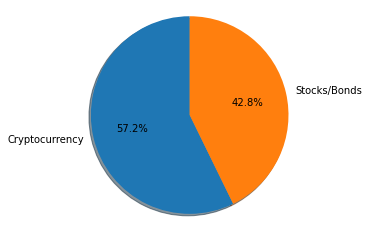

In [145]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart

import matplotlib.pyplot as plt
labels = "Cryptocurrency", "Stocks/Bonds"
sizes = [total_crypto_wallet, total_stocks_bonds]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()



#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [146]:
# Create a variable named emergency_fund_value

emergency_fund_value = monthly_income * 3

print(emergency_fund_value)


36000


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [147]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if emergency_fund_value > 36000:
    print("Congratulations! You have enough money in this fund. You're not poor!")

if emergency_fund_value == 36000:
    print("Congratulations on reaching your emergency fund goal!")
    
if emergency_fund_value < 36000:
    print("Make good choices... you are short of your goal by ${36000 - emergency_fund_value}")


Congratulations on reaching your emergency fund goal!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [148]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 

start = pd.Timestamp("2018-10-22", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-10-22", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows

limit_rows = 1000

In [149]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

portfolio_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = limit_rows
).df


# Display both the first and last five rows of the DataFrame

portfolio_df.head(5)
portfolio_df.tail(5)


AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2021-10-18 00:00:00-04:00  114.33  114.5600  114.2500  114.49  5145953.0   
2021-10-19 00:00:00-04:00  114.37  114.3700  114.1600  114.18  3999066.0   
2021-10-20 00:00:00-04:00  114.17  114.2900  114.0600  114.07  5881766.0   
2021-10-21 00:00:00-04:00  114.01  114.0400  113.8423  113.85  4741154.0   
2021-10-22 00:00:00-04:00  113.97  114.1399  113.8950  114.07  3309637.0   

                              SPY                                     
                             open     high     low   close    volume  
time                                                                  
2021-10-18 00:00:00-04:00  443.97  447.550  443.27  447.22  51994387  
2021-10-19 00:00:00-04:00  448.92  450.700  448.27  450.68  40790864  
2021-10-20 00:00:00-04:00  451.13  452.732  451.01  452.39  41594298  
2021-10-21 00:00:00-04:00  451.76  453.829  451.31  453.61  33945007  
2021-10-22 00:00:00-04:00  453.13  454.670  451.05  453.13  50771701

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [159]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.

monte_carlo_30 = MCSimulation(
  portfolio_data = portfolio_df, weights = [.40,.60],
  num_simulation = 500, num_trading_days = 30 * 252
)

# Review the simulation input data

monte_carlo_30.portfolio_data.head()


AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2018-10-22 00:00:00-04:00  104.47  104.52  104.340  104.350  2634319.0   
2018-10-23 00:00:00-04:00  104.67  104.74  104.475  104.485  3281760.0   
2018-10-24 00:00:00-04:00  104.69  104.81  104.670  104.760  4029453.0   
2018-10-25 00:00:00-04:00  104.71  104.77  104.610  104.665  3882207.0   
2018-10-26 00:00:00-04:00  104.88  105.05  104.870  104.915  4411985.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-10-22 00:00:00-04:00          NaN  277.00  277.36  274.41  275.06   
2018-10-23 00:00:00-04:00     0.001294  270.94  274.87  268.61  273.54   
2018-10-24 00:00:00-04:00     0.002632  273.33  273.76  264.70  265.22   
2018-10-25 00:00:00-04:00    -0.000907  267.37  271.81  266.23  270.14   
2018-10-26 00:00:00-04:00     0.002389  265.92  271.00  262.29  265.29   

                                                   
                              volume daily_return  
time                                               
2018-10-22 00:00:00-04:00   64990700          NaN  
2018-10-23 00:00:00-04:00  113790534    -0.005526  
2018-10-24 00:00:00-04:00  130172487    -0.030416  
2018-10-25 00:00:00-04:00   97215770     0.018551  
2018-10-26 00:00:00-04:00  161147868    -0.017954

In [160]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns

monte_carlo_30.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003624,1.002461,0.998989,1.013740,0.987752,1.003849,1.000805,0.990572,0.990912,0.995070,...,1.002444,1.001348,1.010547,1.005111,1.001116,0.996211,1.006443,1.002597,1.003116,1.006299
2,1.016432,0.994374,1.004942,1.011204,0.982436,1.010777,1.000895,0.993320,0.998593,0.991147,...,0.996948,1.010464,1.014388,1.010550,1.003199,0.994885,1.019671,1.003466,1.000716,0.986686
3,1.022382,0.985562,0.993587,1.016943,0.968082,1.024474,1.005024,0.986983,1.002986,0.987272,...,1.017781,1.015125,1.015963,0.996921,0.997576,0.990392,1.031104,1.017017,0.998601,0.983152
4,1.004888,0.989958,0.989245,1.017674,0.973617,1.012363,0.996231,0.978793,1.009257,0.980172,...,1.029852,1.004152,1.006310,1.007947,1.002329,0.986840,1.036673,1.029160,0.994609,0.985546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,26.232694,23.725744,13.849068,117.970709,57.890787,18.887138,19.866106,19.162874,31.323664,15.408466,...,49.320932,27.978901,27.999161,66.719229,12.033952,33.812420,65.652216,16.436104,79.694763,143.429780
7557,26.284172,23.441969,13.816394,119.839122,58.314102,18.975610,20.034055,18.804228,31.514717,15.576253,...,49.600083,28.492699,27.977270,66.917023,11.985864,33.765359,65.008038,16.284896,80.070688,143.286854
7558,26.321898,23.486905,13.701440,119.826780,58.116525,18.846530,19.960198,18.640820,31.628627,15.484333,...,49.582737,28.560844,28.514152,67.409778,11.993351,33.361559,64.914345,16.373363,79.547792,142.302696
7559,26.403621,23.102139,13.782749,119.478988,59.236122,18.812633,19.698391,18.978102,31.704251,15.373964,...,49.858690,28.797340,28.740621,68.338531,12.022264,33.198101,64.244968,16.455780,80.226951,142.274485


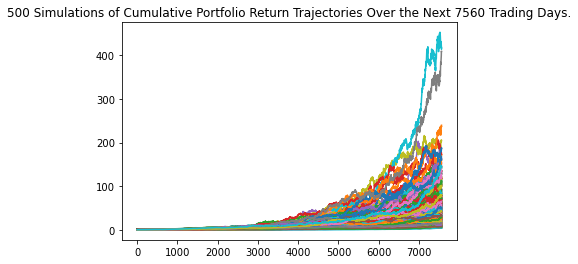

In [193]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot

monte_carlo_30_plot = monte_carlo_30.plot_simulation()

monte_carlo_30_plot.get_figure().savefig("monte_carlo_30_plot.png", bbox_inches="tight)


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

In [176]:
type(monte_carlo_30)
print(monte_carlo_30)

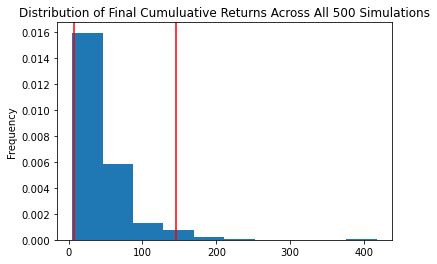

In [177]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram

monte_carlo_30_plot = monte_carlo_30.plot_distribution()

monte_carlo_30_plot.get_figure().savefig("monte_carlo_30_plot.png", bbox_inches = "tight")



#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [166]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable

monte_carlo_30_summary_stats = monte_carlo_30.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics

monte_carlo_30_summary_stats

count           500.000000
mean             46.351168
std              42.196232
min               4.944673
25%              21.627066
50%              34.338586
75%              58.014129
max             416.649684
95% CI Lower      7.656628
95% CI Upper    145.885071
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [173]:
# Print the current balance of the stock and bond portion of the members portfolio

print(total_portfolio)


168019.58


In [172]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

ci_lower_thirty_cumulative_return = monte_carlo_30_summary_stats[8] * 10000

ci_upper_thirty_cumulative_return = monte_carlo_30_summary_stats[9] * 10000

# Print the result of your calculations

print(f"In 30 years, there is a 95% chance that the $10,000 initial investment will be worth between"
  f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")


In 30 years, there is a 95% chance that the $10,000 initial investment will be worth between $ 76566.28 and $ 1458850.71.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [186]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.

monte_carlo_10 = MCSimulation(
  portfolio_data = portfolio_df, weights = [.20,.80],
  num_simulation = 500, num_trading_days = 10 * 252
)

# Review the simulation input data

monte_carlo_10.portfolio_data.head()


AGG                                       \
                             open    high      low    close     volume   
time                                                                     
2018-10-22 00:00:00-04:00  104.47  104.52  104.340  104.350  2634319.0   
2018-10-23 00:00:00-04:00  104.67  104.74  104.475  104.485  3281760.0   
2018-10-24 00:00:00-04:00  104.69  104.81  104.670  104.760  4029453.0   
2018-10-25 00:00:00-04:00  104.71  104.77  104.610  104.665  3882207.0   
2018-10-26 00:00:00-04:00  104.88  105.05  104.870  104.915  4411985.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-10-22 00:00:00-04:00          NaN  277.00  277.36  274.41  275.06   
2018-10-23 00:00:00-04:00     0.001294  270.94  274.87  268.61  273.54   
2018-10-24 00:00:00-04:00     0.002632  273.33  273.76  264.70  265.22   
2018-10-25 00:00:00-04:00    -0.000907  267.37  271.81  266.23  270.14   
2018-10-26 00:00:00-04:00     0.002389  265.92  271.00  262.29  265.29   

                                                   
                              volume daily_return  
time                                               
2018-10-22 00:00:00-04:00   64990700          NaN  
2018-10-23 00:00:00-04:00  113790534    -0.005526  
2018-10-24 00:00:00-04:00  130172487    -0.030416  
2018-10-25 00:00:00-04:00   97215770     0.018551  
2018-10-26 00:00:00-04:00  161147868    -0.017954

In [187]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns

monte_carlo_10.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990713,0.994820,0.993169,0.992748,1.005661,0.987838,1.006119,0.996788,1.009912,1.018330,...,0.994246,1.007566,0.996215,0.988950,0.994292,1.011246,1.014784,1.003302,0.977856,1.008019
2,1.006396,1.000159,0.998173,1.002176,0.984531,0.994295,1.040780,0.991988,1.020098,1.012506,...,1.006952,1.015141,0.985056,0.992567,0.994829,1.012554,1.005051,1.010993,0.988354,1.008371
3,1.015492,0.988854,1.003120,1.007187,0.995793,0.996989,1.040110,1.003534,1.032233,1.011235,...,0.993880,1.019247,0.968124,0.987437,0.964221,1.016502,1.021294,1.013335,0.958043,0.982566
4,0.999172,0.995933,1.009449,0.990855,1.009665,0.990968,1.061026,0.982276,1.048752,1.003412,...,0.979192,1.013674,0.989568,0.989564,0.969589,1.034185,1.032253,1.057768,0.954716,0.993274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.438400,2.702929,2.415842,6.000419,11.327148,4.784508,6.493127,7.198303,4.270456,2.367531,...,2.449747,6.317014,5.953722,4.023898,2.500921,3.502065,4.922204,2.683499,3.375855,4.510926
2517,5.465037,2.724719,2.398155,6.016686,11.243951,4.789808,6.482407,7.158088,4.285703,2.405119,...,2.455550,6.328838,6.023354,4.004330,2.486169,3.579331,4.949327,2.693048,3.410323,4.543310
2518,5.496300,2.709799,2.407983,5.896874,11.426820,4.844756,6.555140,7.237356,4.257205,2.355722,...,2.412460,6.397479,6.066465,4.031158,2.511549,3.599116,4.907742,2.699785,3.472608,4.520741
2519,5.588616,2.716940,2.442182,5.913868,11.709554,4.839596,6.583064,7.199432,4.241449,2.359819,...,2.482514,6.386527,6.037666,4.018024,2.525109,3.598357,4.992349,2.703832,3.436072,4.569577


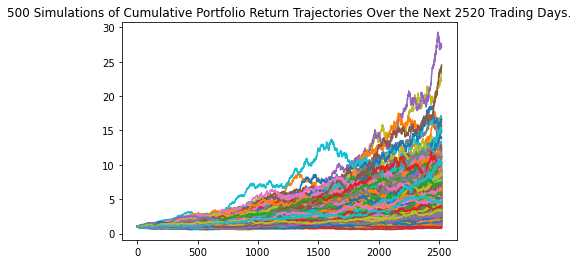

In [188]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot

monte_carlo_10_plot = monte_carlo_10.plot_simulation()

monte_carlo_10_plot.get_figure().savefig("monte_carlo_30_plot.png", bbox_inches="tight")


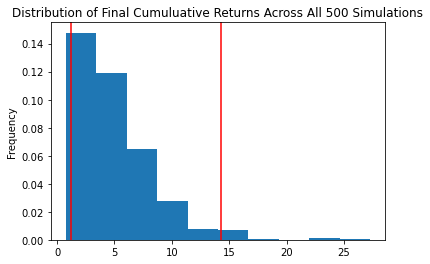

In [189]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram

monte_carlo_10_plot = monte_carlo_10.plot_distribution()

monte_carlo_10_plot.get_figure().savefig("monte_carlo_10_plot.png", bbox_inches = "tight")


In [190]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable

monte_carlo_10_summary_stats = monte_carlo_10.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics

monte_carlo_10_summary_stats

count           500.000000
mean              5.125080
std               3.426784
min               0.759032
25%               2.720188
50%               4.240898
75%               6.563620
max              27.285904
95% CI Lower      1.229024
95% CI Upper     14.310241
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [191]:
# Print the current balance of the stock and bond portion of the members portfolio

print(total_portfolio)


168019.58


In [192]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

ci_lower_ten_cumulative_return = monte_carlo_10_summary_stats[8] * 10000

ci_upper_ten_cumulative_return = monte_carlo_10_summary_stats[9] * 10000

# Print the result of your calculations

print(f"In 30 years, there is a 95% chance that the $10,000 initial investment will be worth between"
  f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")


In 30 years, there is a 95% chance that the $10,000 initial investment will be worth between $ 12290.24 and $ 143102.41.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?